# Visualização de Dados 🔍 🎲

## Sumário da Aula

<ul>
    <li>Aspectos de Visualização de Dados 🔍 🎲</li>
    <li>Gráficos</li>
    <ul>
        <li>Linhas 📈</li>
        <li>Barras 📊</li>
    </ul>
    <li>Demais Gráficos</li>
    <ul>
        <li>Histogramas 📶</li>
        <li>Densidade 🛎️</li>
        <li>Dispersão ⛬</li>
    </ul>
</ul>

### Biblioteca(s) Principal(is) 📚: pandas, matplotlib, seaborn

<img src="https://pandas.pydata.org/docs/_static/pandas.svg" width="100" style="float: right;">

<img src="https://matplotlib.org/_static/images/logo2.svg" width="100" style="float: right;">

<img src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" width="100" style="float: right;">

In [1]:
!pip install --upgrade matplotlib --quiet


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
!pip install --upgrade seaborn --quiet


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import seaborn as sns

#### Funções Auxiliares

In [6]:
import os
import pandas as pd

def build_path(subfolder = 'merge'):
    folderpath = os.path.join(os.getcwd(), os.pardir, 
                              'project', 'data', subfolder)
    folderpath = os.path.abspath(folderpath)
    if not os.path.exists(folderpath): 
        os.makedirs(folderpath)
    return folderpath

def load_data():
    data = {}   
    folderpath = build_path()
    for filename in os.listdir(folderpath):
        if filename.endswith('.json'):
            filepath = os.path.join(build_path(), filename)
            data[filename.split('.')[0]] = pd.read_json(filepath)
    return data

## Aspectos de Visualização de Dados 🔍 🎲

<ul>
    <li>A construção de visualizações informativas é um dos elementos mais importantes da Análise de Dados 🕵🏽 🎲
        <ul>
            <li>com um fim em si mesmo (ex. <a href='https://www.economist.com/graphic-detail'>The Economist Graphic Detail</a> -- mais de 3800 gráficos); e</li>
            <li>como parte do processo exploratório (ex. identificação de <i>outlier</i>).</li>
        </ul>
    </li>
    <li>"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python."</li>
    <li>As principais vantagens do matplotlib são o suporte a:
        <ul>
            <li>vários <i>backends</i> de interface gráfica para o usuário em todos os sistemas operacionais; e</li>
            <li>exporta visualizações para todos os formáticos gráficos vetoriais ou rasterizados.</li>
        </ul>
    </li>
    <li>O matplotlib deu origem a várias ferramentas de visualização de dados que o utilizam de forma subjacente (e.g. seaborn).</li>
    <li>Mais ferramentas de visualização de dados: <a href='https://altair-viz.github.io/'>Vega-Altair</a> e <a href='https://docs.bokeh.org/'>bokeh</a></li>
</ul>

<img src="https://matplotlib.org/3.1.1/_images/sphx_glr_anatomy_001.png" width='500' style="margin-left: auto; margin-right: auto;">

👉 Referências: <a href='https://matplotlib.org/stable/index.html'>matplotlib.org</a>, <a href='https://seaborn.pydata.org/'>seaborn.pydata.org</a>

👉 Matplotlib <a href='https://matplotlib.org/cheatsheets/'>cheat sheets</a> + <a href='https://matplotlib.org/gallery/index.html'>gallery</a> e seaborn <a href='https://www.kaggle.com/code/themlphdstudent/cheat-sheet-seaborn-charts'>cheat sheet</a> + <a href='https://seaborn.pydata.org/examples/index.html'>gallery</a>

<pre>Vamos utilizar os dados de vacinação nos Estados e visualizá-los

O objetivo é aprender a configurar os elementos apontados na anatomia da figura acima</pre>

In [7]:
data = load_data()
state_vaccine_shot = data['state_vaccine_shot'].\
        pivot(index='vacinacao_key', columns='nome', 
              values='vacinacao_doc_count').fillna(0)
state_vaccine_shot.index = pd.to_datetime(state_vaccine_shot.index, 
                                          unit='ms')
state_vaccine_shot.index.name = 'Data'
state_vaccine_shot.columns.name = 'Estado'

<pre>Vamos escolher arbitrariamente um Estado para utilizar como Estudo de Caso</pre>

In [8]:
from random import randint
index = randint(0, len(state_vaccine_shot.columns)-1)
state = state_vaccine_shot.columns[index]
state

'Paraná'

<pre>Você pode utilizar a função plot do <i>matplotlib</i> para desenhar um gráfico de linha</pre>

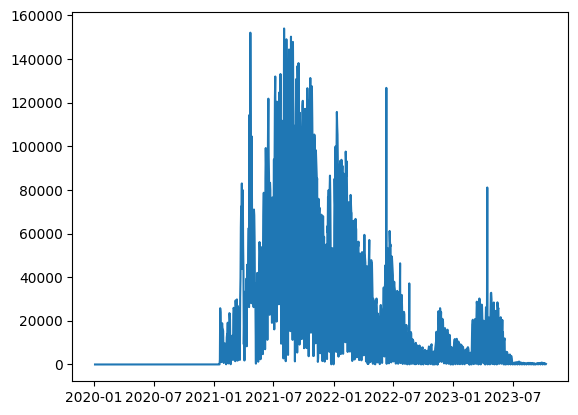

In [9]:
plt.plot(state_vaccine_shot.index, state_vaccine_shot[[state]]);

👉 dica: como estamos utilizando um DataFrame com 1 índice e 1 coluna, podemos inclusive simplificar

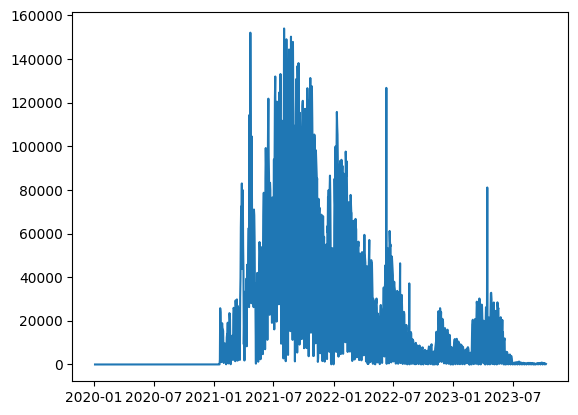

In [10]:
plt.plot(state_vaccine_shot[[state]]);

### Figura e Subplotagem

<pre>As visualizações residem dentro de <i>Figure</i>, que você pode criar especificando o tamanho</pre>

👉 dica: nas células anteriores, utilizávamos ponto e vírgula (<i>;</i>) no final do comando para não imprimir texto sobre a figura.

In [11]:
fig = plt.figure(figsize=(12,7))

<Figure size 1200x700 with 0 Axes>

<pre>Na <i>Figure</i>, você deve acrescentar o espaço para as visualizações -- que pode ser mais de um!</pre>

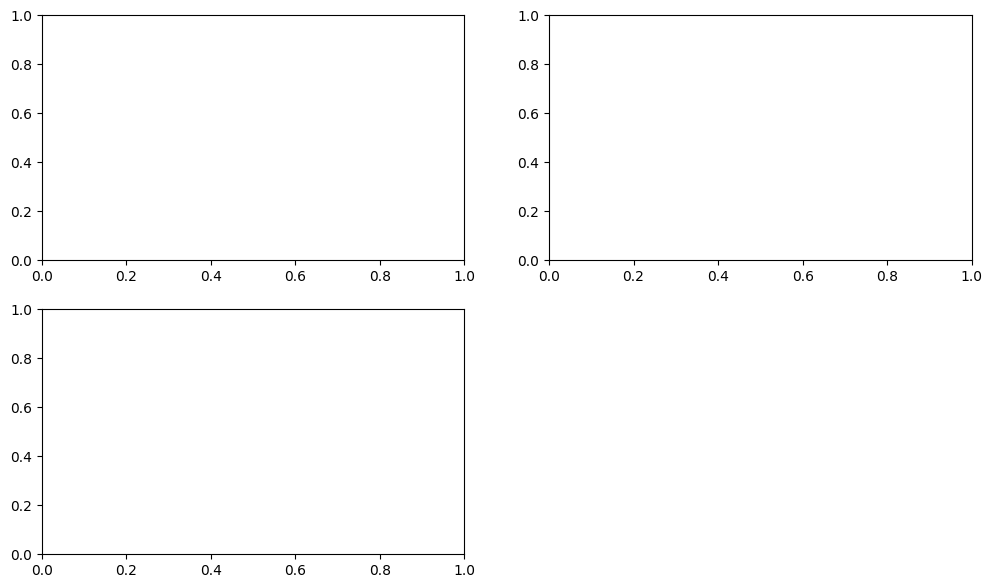

In [12]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(2, 2, 1) #grid 2x2, criar posição 1
ax2 = fig.add_subplot(2, 2, 2) #grid 2x2, criar posição 2
ax3 = fig.add_subplot(2, 2, 3) #grid 2x2, criar posição 3

<pre>Agora, você pode construir as visualizações nos próprios espaços criados</pre>

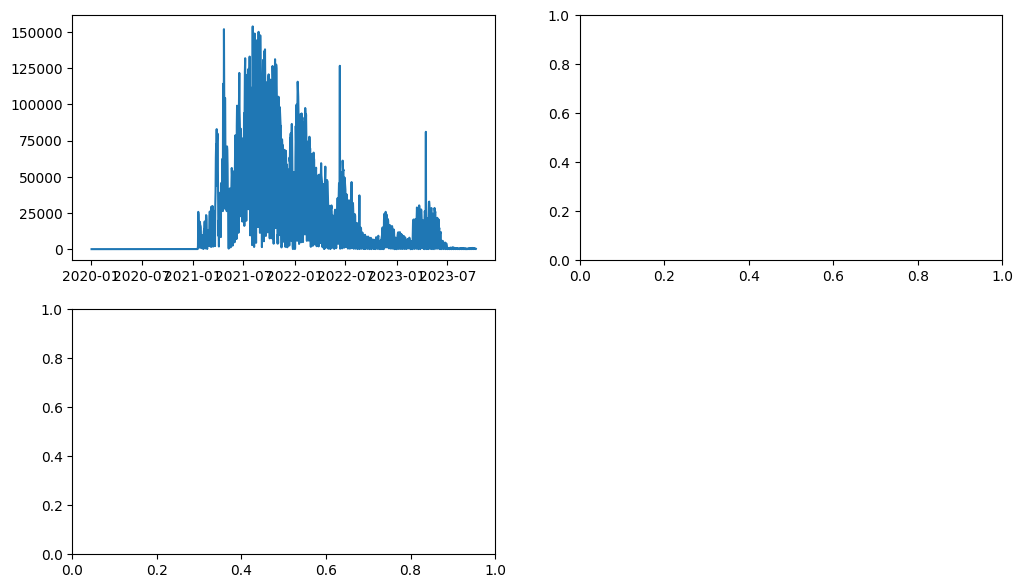

In [13]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.plot(state_vaccine_shot.index, state_vaccine_shot[[state]]);

<pre>Alternativamente, você pode criar os espaços de uma forma mais elegante</pre>

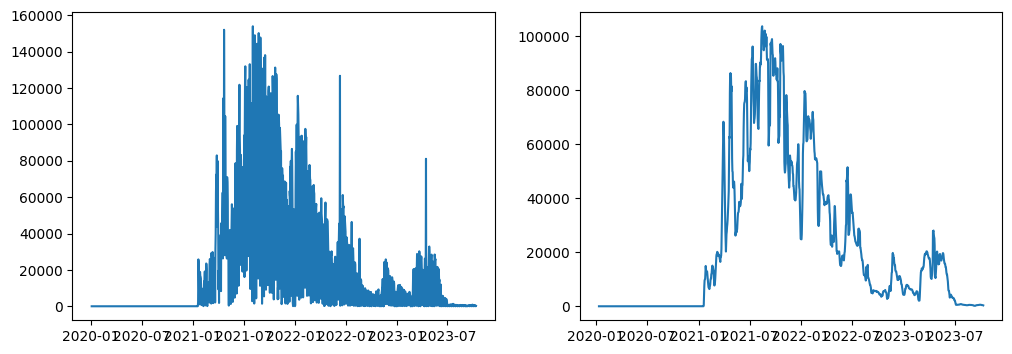

In [14]:
fig = plt.figure(figsize=(12,4))
axs = fig.subplots(1, 2)
#Linha do Tempo
axs[0].plot(state_vaccine_shot.index, state_vaccine_shot[[state]])
#Média Móvel de 7 dias
axs[1].plot(state_vaccine_shot.index, state_vaccine_shot[[state]].\
            rolling(window=7).mean());

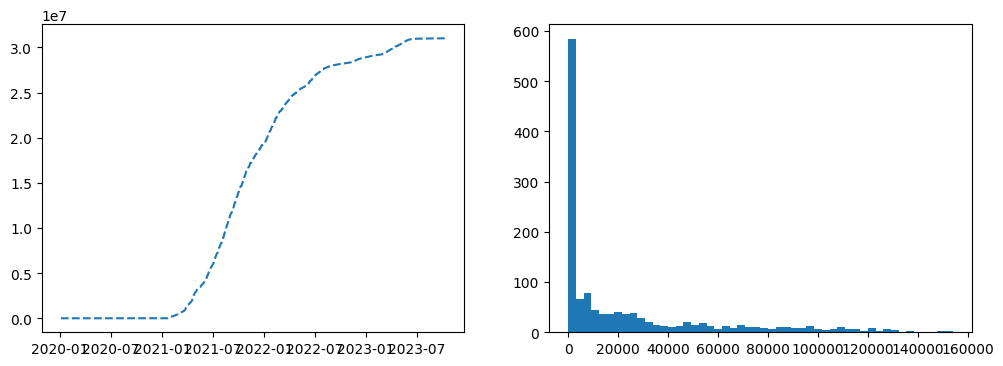

In [15]:
fig = plt.figure(figsize=(12,4))
axs = fig.subplots(1, 2)
#Soma Cumulativa
axs[0].plot(state_vaccine_shot.index, state_vaccine_shot[[state]].\
            cumsum(), linestyle='dashed')
#Histograma com bins de tamanho 50
axs[1].hist(state_vaccine_shot[state], bins=50);

### Cores, Marcadores e Estilos de Linhas

<pre>Você pode configurar cores, marcadores e estilos de linha usando parâmetros da plotagem</pre>

In [16]:
state_vaccine_shot_moving_average = state_vaccine_shot.\
                                rolling(window=7).mean()

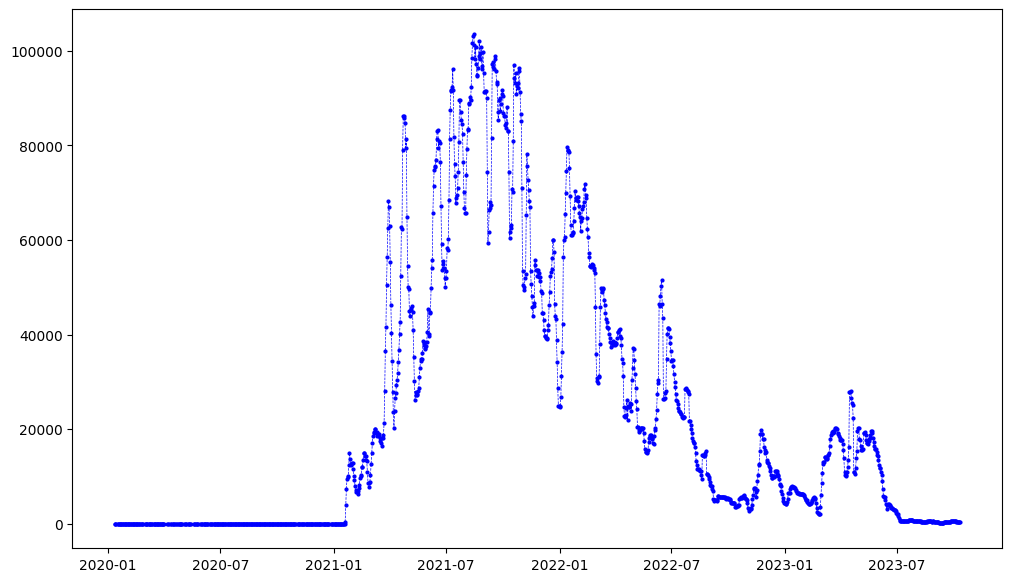

In [17]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(state_vaccine_shot_moving_average.index, 
        state_vaccine_shot_moving_average[[state]], 
        color="blue", linewidth=0.5, linestyle="dashed", 
        marker="o", markersize=2);

<pre>🍒 🎂 Você pode também sobrepor figuras no mesmo espaço 🤔</pre>

In [18]:
from random import choices
states = choices(state_vaccine_shot.columns, k=2)
colors = ['blue', 'orange']
states, colors

(['Tocantins', 'Goiás'], ['blue', 'orange'])

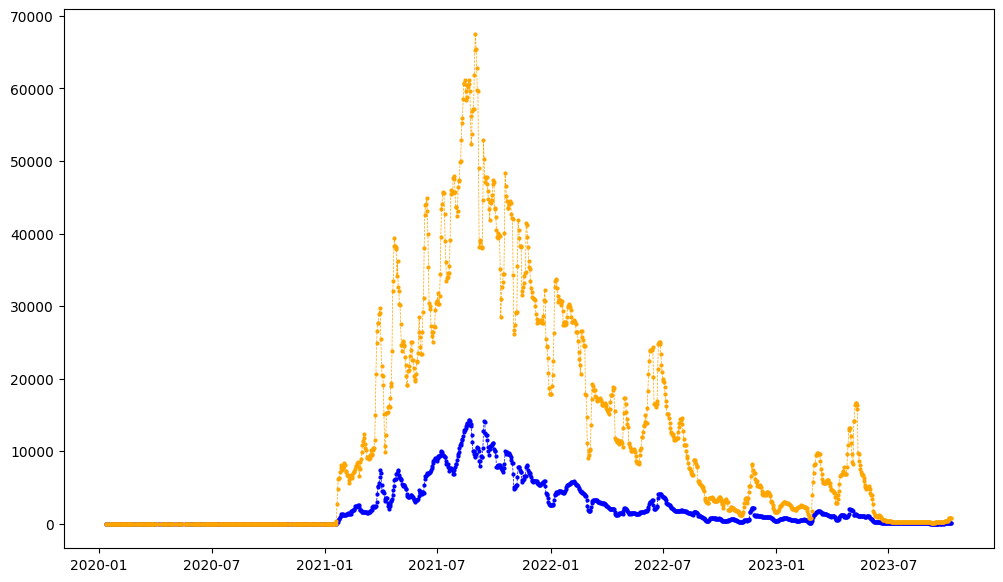

In [19]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()
for state, color in zip(states, colors):
    ax.plot(state_vaccine_shot_moving_average.index, 
            state_vaccine_shot_moving_average[[state]], 
            color=color, linewidth=0.5, linestyle="dashed", 
            marker="o", markersize=2)

### Limites

<pre>Você pode definir os limites do seu gráfico; funciona como uma espécie de <i>zoom</i></pre>

In [20]:
ax.get_ylim()

(-3376.4857142857145, 70906.20000000001)

👉 dica: no nosso caso, o eixo x é um número representando uma data; vamos decodificá-lo

In [21]:
from matplotlib import dates
dates.num2date(ax.get_xlim())

[datetime.datetime(2019, 11, 4, 14, 24, tzinfo=datetime.timezone.utc),
 datetime.datetime(2023, 12, 18, 9, 36, tzinfo=datetime.timezone.utc)]

🚨 A partir de agora, é aconselhável seguir a aula pelo Jupyter

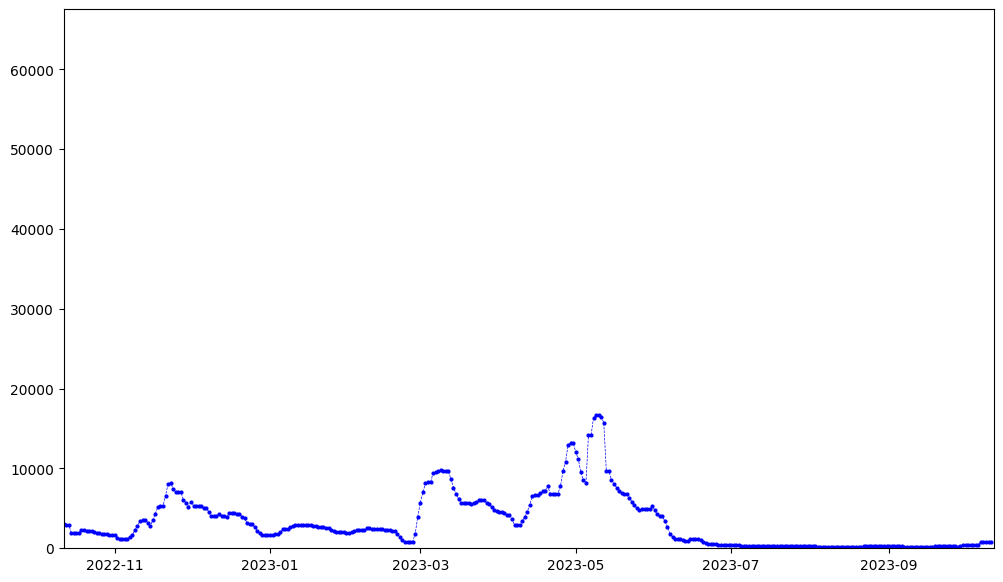

In [22]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(state_vaccine_shot_moving_average.index, state_vaccine_shot_moving_average[state],
        color="blue", linewidth=0.5, linestyle="dashed", marker="o", markersize=2)

#código adicionado
from datetime import date, timedelta
ax.set_xlim([date.today() - timedelta(days=365), date.today()])
ax.set_ylim([0, state_vaccine_shot_moving_average[state].max()]);

### Tiques, Grades, Spines, Rótulos e Títulos

<pre>Você pode definir os tiques do seu gráfico; bem como grades, spines, rótulos e títulos</pre>

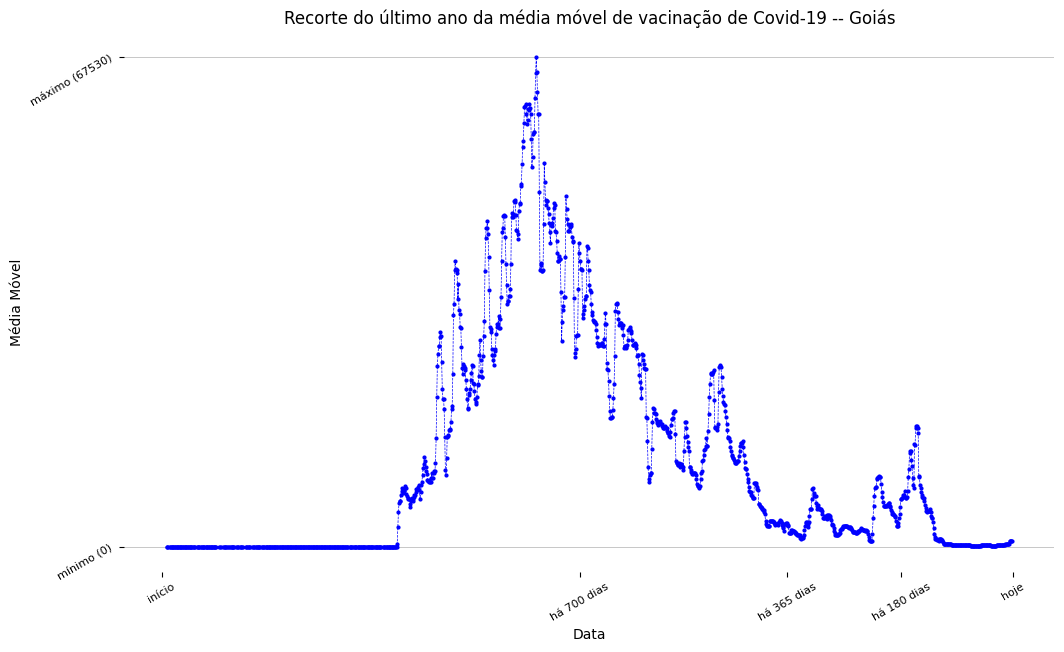

In [23]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(state_vaccine_shot_moving_average.index, state_vaccine_shot_moving_average[state],
        color="blue", linewidth=0.5, linestyle="dashed", marker="o", markersize=2)

#major ticks
ax.set_xticks([state_vaccine_shot_moving_average.index.min(),
               date.today() - timedelta(days=700), 
               date.today() - timedelta(days=365), 
               date.today() - timedelta(days=180), 
               date.today()])
ax.set_xticklabels(['início', 'há 700 dias', 'há 365 dias', 'há 180 dias', 'hoje'], 
                   rotation=30, fontsize=8)

ax.set_yticks([0, round(state_vaccine_shot_moving_average[state].max())])
ax.set_yticklabels([f'mínimo ({ax.get_yticks()[0]})', 
                    f'máximo ({ax.get_yticks()[1]})'], rotation=30, fontsize=8);

#minor ticks
ax.xaxis.set_tick_params(which='minor', bottom=True)

#grid
ax.grid(axis='y', which='major', visible=True, linewidth=0.5)
ax.grid(axis='x', which='major', visible=False)

#spines
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)

#título e rótulos
ax.set(title=f'Recorte do último ano da média móvel de vacinação de Covid-19 -- {state}',
       xlabel='Data', ylabel='Média Móvel');


### Legendas e Anotações

<pre>Você pode inserir legenda e anotações em qualquer lugar da figura</pre>

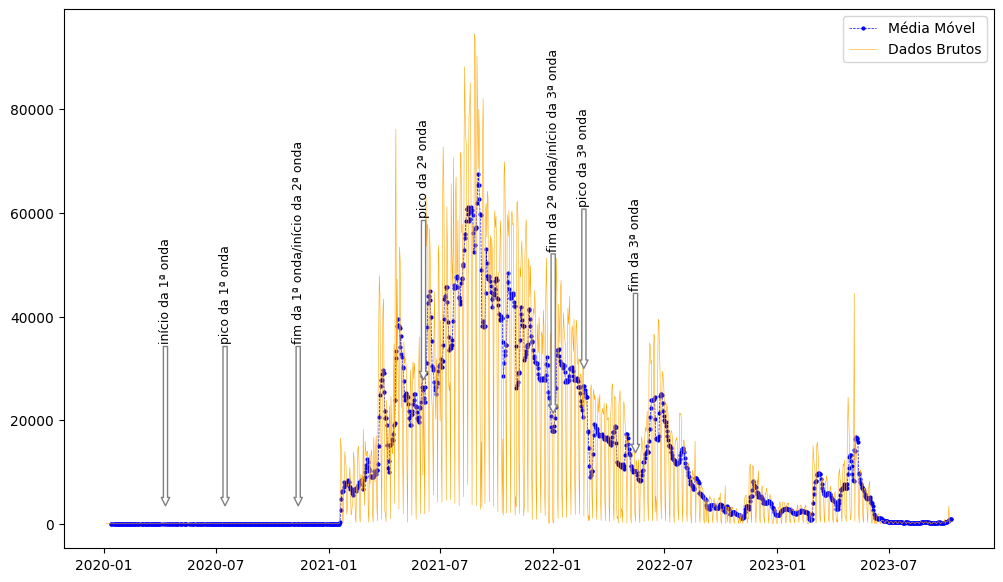

In [24]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(state_vaccine_shot_moving_average.index, state_vaccine_shot_moving_average[state], 
        color="blue", linewidth=0.5, linestyle="dashed", marker="o", markersize=2, label='Média Móvel');

#figura sobreposta no mesmo espaço, com atributo label para constar na legenda do gráfico
ax.plot(state_vaccine_shot.index, state_vaccine_shot[state], 
        color="orange", linewidth=0.4, linestyle="solid", label='Dados Brutos');
ax.legend(loc='best')

#anotações
ondas_da_covid = [(pd.Timestamp(2020, 4, 10), 'início da 1ª onda'),
                  (pd.Timestamp(2020, 7, 16), 'pico da 1ª onda'),
                  (pd.Timestamp(2020, 11, 12), 'fim da 1ª onda/início da 2ª onda'),
                  (pd.Timestamp(2021, 6, 4), 'pico da 2ª onda'),
                  (pd.Timestamp(2022, 1, 1), 'fim da 2ª onda/início da 3ª onda'),
                  (pd.Timestamp(2022, 2, 20), 'pico da 3ª onda'),
                  (pd.Timestamp(2022, 5, 15), 'fim da 3ª onda')]

for date, label in ondas_da_covid:
    ax.annotate(label, 
                xy=(date.date(), state_vaccine_shot_moving_average[state].asof(date) + 0.035*ax.get_ylim()[1]),
                xytext=(date.date(), state_vaccine_shot_moving_average[state].asof(date) + 0.35*ax.get_ylim()[1]),
                rotation=90, 
                fontsize=9,
                arrowprops=dict(facecolor="white", edgecolor='gray', headwidth=6, width=3, headlength=6),
                horizontalalignment="center", 
                verticalalignment="bottom")

<pre>🍒 🎂 Você pode salvar o seu gráfico no formato desejado (de acordo com a extensão!)</pre>

In [25]:
fig.savefig(f'Vacinação - {state}.svg', dpi=300)

## Gráficos

### Linhas 📈

<pre>Vínhamos desenhando gráficos de linha com matplotlib; vamos usar o pandas como alternativa?

de quebra, vamos desenhar os gráficos de todos os estados com um único comando?</pre>

👉 dica: para estilizar seus gráficos, você pode definir um contexto de estilo

escolheremos arbitrariamente entre as opções disponíveis

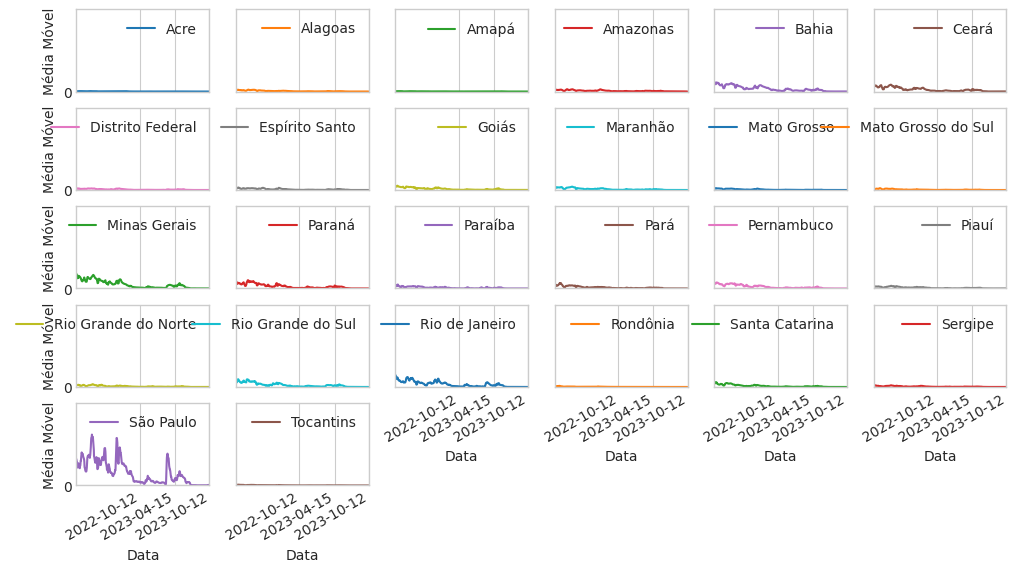

In [26]:
with plt.style.context(plt.style.available[randint(0, len(plt.style.available)-1)]):
    state_vaccine_shot_moving_average.plot(kind='line', 
                                           figsize=(12,7), 
                                           xticks=[date.today() - timedelta(days=365), 
                                                   date.today() - timedelta(days=180),
                                                   date.today()],
                                           yticks=[0, round(state_vaccine_shot_moving_average.max().max())],
                                           xlim=[date.today() - timedelta(days=700), date.today()],
                                           ylim=[0, state_vaccine_shot_moving_average.max().max()],
                                           xlabel='Data', 
                                           ylabel='Média Móvel', 
                                           subplots=True, layout=(5,6), sharex=True, sharey=True);

### Barras 📊

<pre>Ainda com pandas, podemos fazer o gráfico de barras -- com comandos distintos</pre>

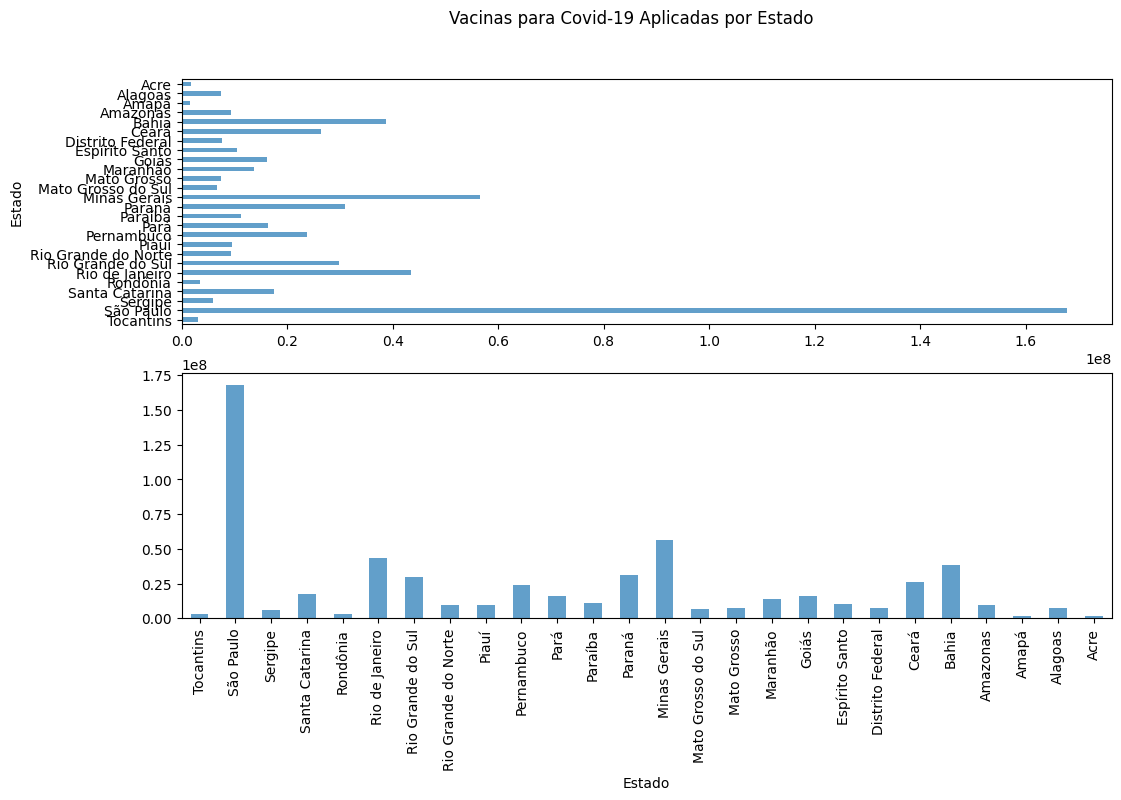

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(12,7))

state_vaccine_shot_total = state_vaccine_shot.sum().sort_index(ascending=False)
state_vaccine_shot_total.plot.barh(ax=axes[0], alpha=0.7)
state_vaccine_shot_total.plot(kind='bar', ax=axes[1], alpha=0.7) #ou state_vaccine_shot_total.plot.bar(ax=axes[1], alpha=0.7) 

fig.suptitle('Vacinas para Covid-19 Aplicadas por Estado');

<pre>Agora, vamos colocar uma lupa nos nossos dados? Não pela definição de novos limites nos eixos, mas por um olhar apurado sobre a última semana de vacinação</pre>

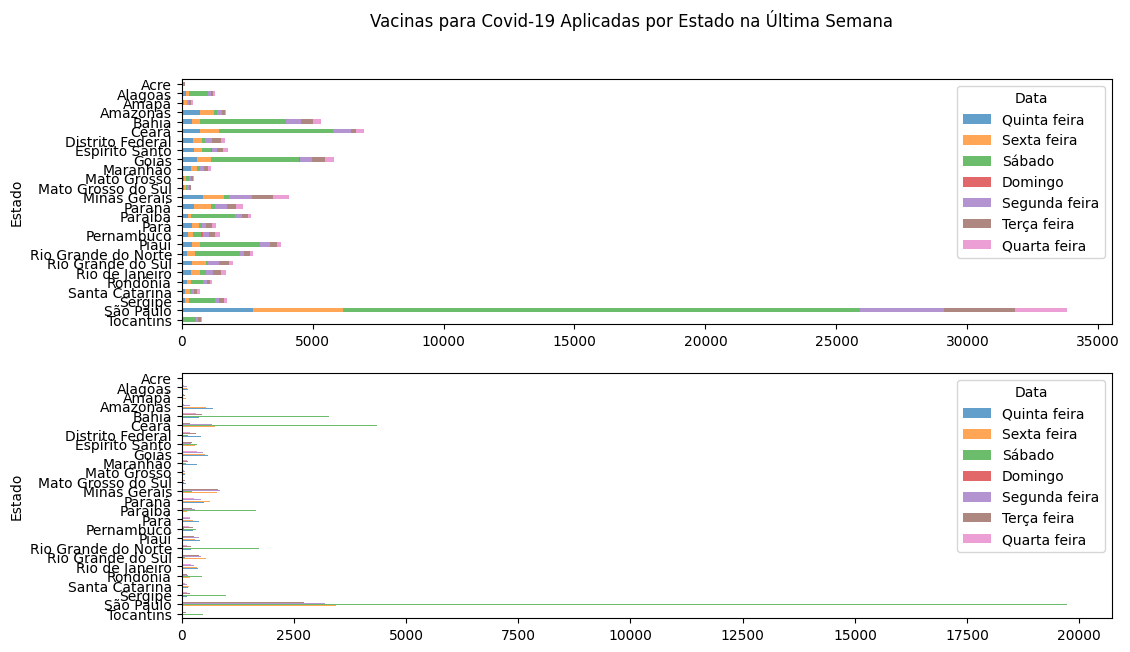

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(12,7))

state_vaccine_shot_last_week = state_vaccine_shot[-7:].sort_index(axis='columns', ascending=False)
state_vaccine_shot_last_week.index = state_vaccine_shot_last_week.index.day_name(locale='pt_br')

state_vaccine_shot_last_week.T.plot.barh(ax=axes[0], stacked=True, alpha=0.7);
state_vaccine_shot_last_week.T.plot.barh(ax=axes[1], stacked=False, alpha=0.7);

fig.suptitle('Vacinas para Covid-19 Aplicadas por Estado na Última Semana');

👉 dica: as figuras anteriores usaram valores absolutos. Caso nossa necessidade seja a de avaliar a distribuição relativa da aplicação de vacinas nos dias da última semana, precisamos dividir pelo número de vacinas aplicas no Estado

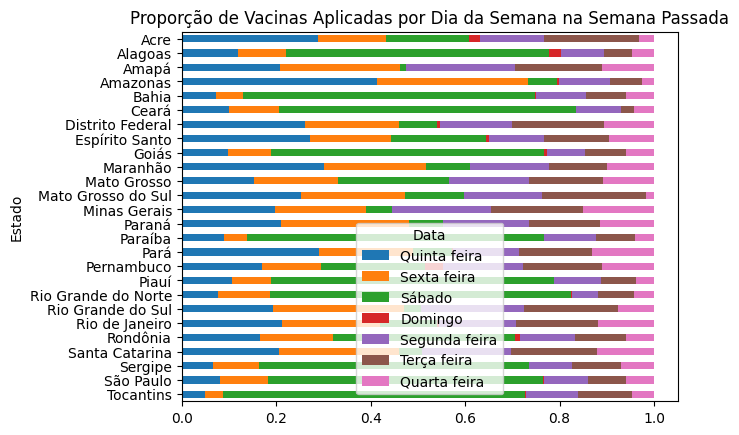

In [29]:
state_vaccine_shot_last_week = state_vaccine_shot_last_week.div(state_vaccine_shot_last_week.sum(axis='index'), axis='columns')
state_vaccine_shot_last_week.T.plot.barh(stacked=True, title='Proporção de Vacinas Aplicadas por Dia da Semana na Semana Passada');

<pre>🍒 🎂 Note que parece haver um padrão de vacinação nos dias da semana. Vamos avaliar?</pre>

<pre>Primeiro, vamos despivotar e depois vamos utilizar o seaborn para essa avaliação</pre>

In [30]:
state_vaccine_shot_last_week = state_vaccine_shot_last_week.\
                                reset_index().\
                                melt(id_vars='Data', 
                                     value_vars=state_vaccine_shot_last_week.columns[1:],
                                     value_name='Percentual')

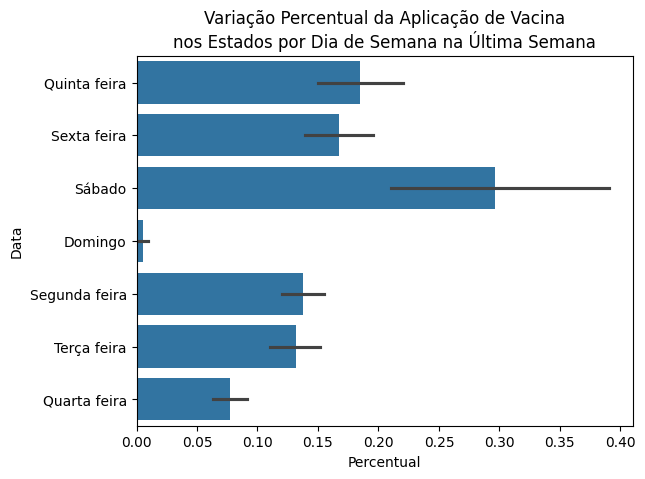

In [31]:
sns.barplot(data=state_vaccine_shot_last_week, 
            x='Percentual',
            y='Data',            
            orient='h').set(title="""Variação Percentual da Aplicação de Vacina
nos Estados por Dia de Semana na Última Semana""");

## Mais Gráficos

<pre>Agora, com as ferramentas de visualização de gráficos desta aula, vamos construir:</pre>

### Histogramas 📶

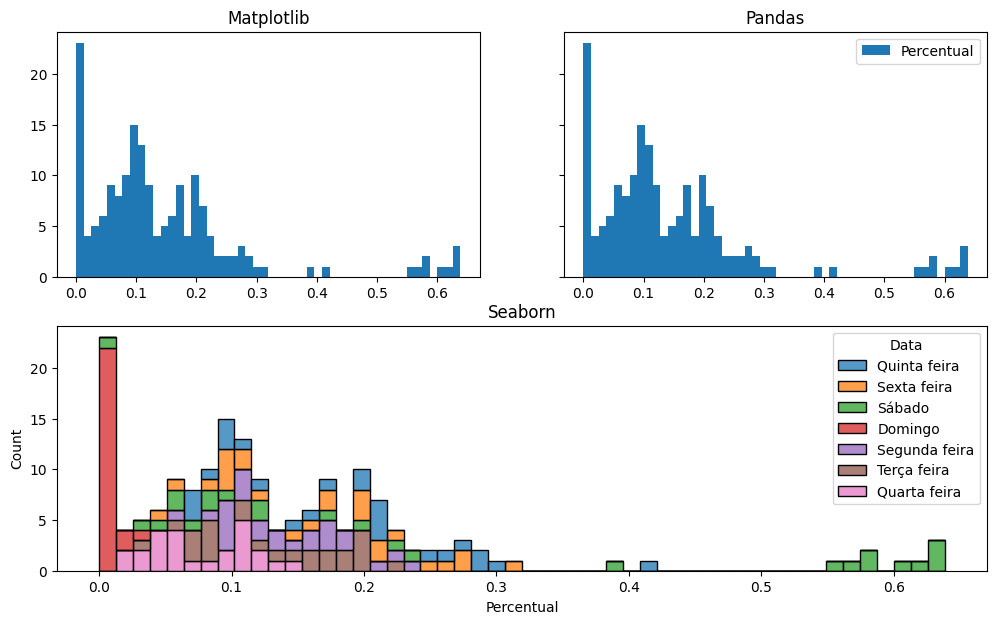

In [32]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Matplotlib')
ax1.hist(x=state_vaccine_shot_last_week['Percentual'], bins=50);

ax2 = plt.subplot(2, 2, 2, sharey=ax1)
ax2.set_title('Pandas')
state_vaccine_shot_last_week.plot.hist(column='Percentual', bins=50, ax=ax2);

ax3 = plt.subplot(2, 1, 2)
plt.title('Seaborn')
sns.histplot(data=state_vaccine_shot_last_week, x='Percentual', hue='Data', 
             multiple='stack', bins=50, ax=ax3);

### Densidade 🛎️

In [33]:
!pip install --upgrade scipy --quiet


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


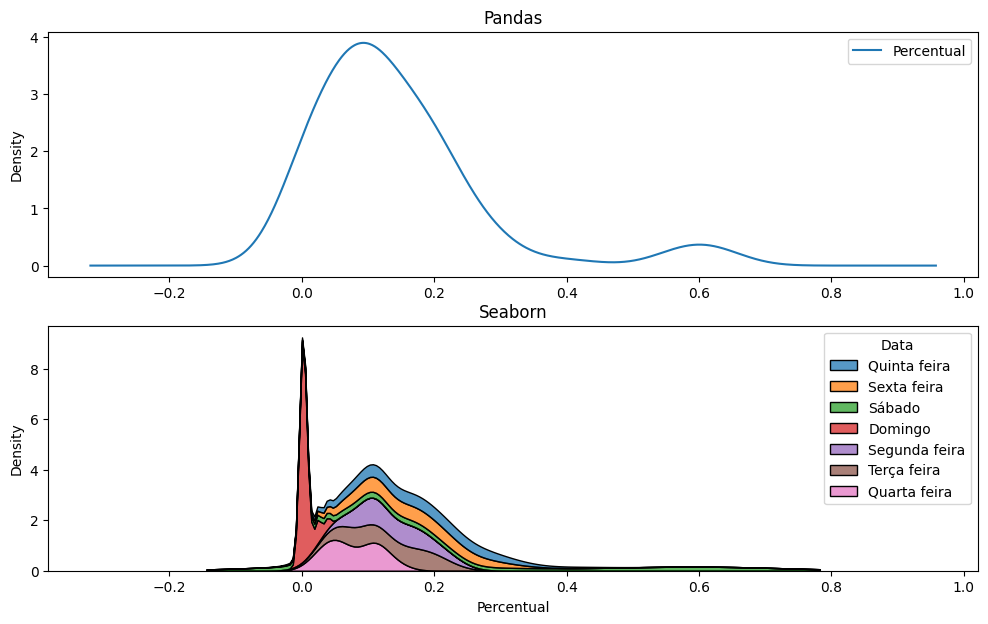

In [34]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Pandas')
state_vaccine_shot_last_week.plot.density(column='Percentual', ax=ax1);

ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.title('Seaborn')
sns.kdeplot(data=state_vaccine_shot_last_week, x='Percentual', hue='Data', multiple='stack', ax=ax2);

### Dispersão ⛬

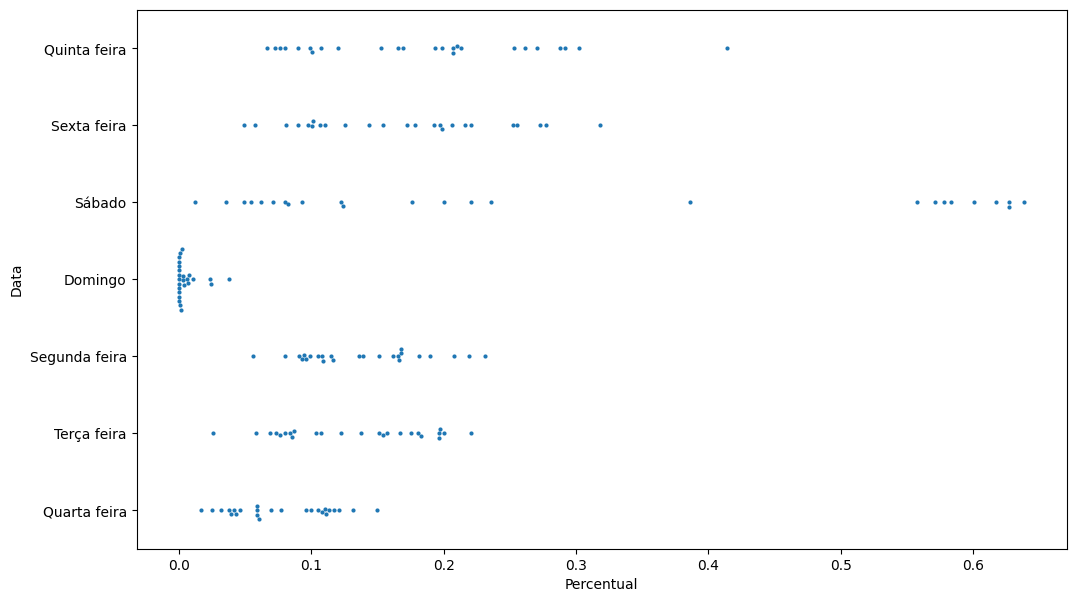

In [35]:
fig, ax = plt.subplots(figsize=(12,7))
sns.swarmplot(data=state_vaccine_shot_last_week, 
            x='Percentual',
            y='Data', size=3, ax=ax);

#### Extra! Regressão Linear ⛬

<pre>Vamos avaliar o contraste entre o número de habitantes e o número de óbitos</pre>

In [36]:
city_infecction = data['city_infecction']
city_infecction_sum = city_infecction.pivot(index='data', columns='codigo_ibge', values='obitosNovos').sum()
city_infecction_sum.name = 'obitosNovos'
city_population = city_infecction[['codigo_ibge', 'populacaoTCU2019']].drop_duplicates().set_index('codigo_ibge')
city_infecction_and_population = pd.concat([city_infecction_sum, city_population], axis='columns')

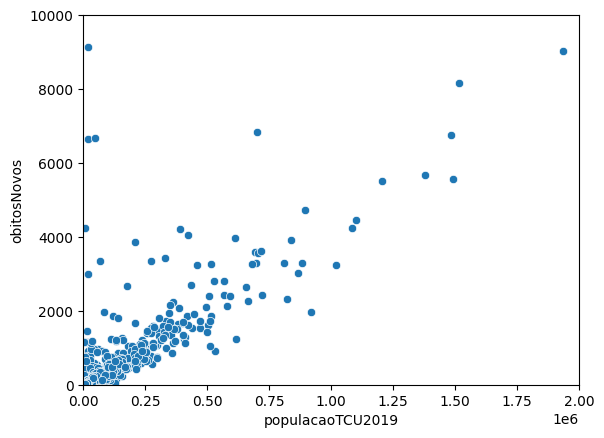

In [37]:
g = sns.scatterplot(data=city_infecction_and_population,
                    x='populacaoTCU2019', y='obitosNovos')
g.set(xlim=(0, 2e6), ylim=(0, 10000));

<pre>Vamos identificar se há um padrão</pre>

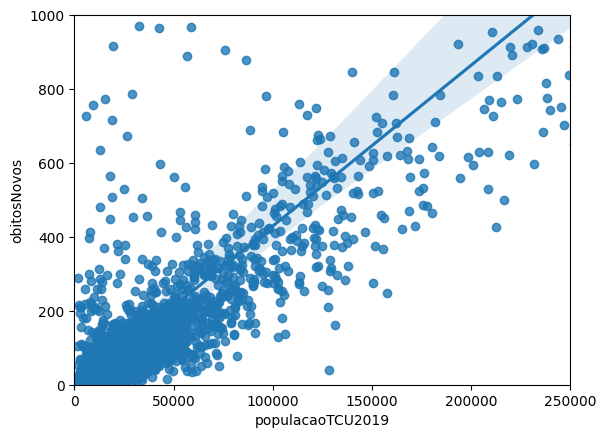

In [38]:
g = sns.regplot(data=city_infecction_and_population,
                x='populacaoTCU2019', y='obitosNovos')
g.set(xlim=(0, 25e4), ylim=(0, 1_000));

<pre>Vamos identificar se o padrão é o mesmo para cidades pequenas e cidades maiores</pre>

👉 Critério de separação entre cidades pequenas e cidades maiores: 50 mil habitantes

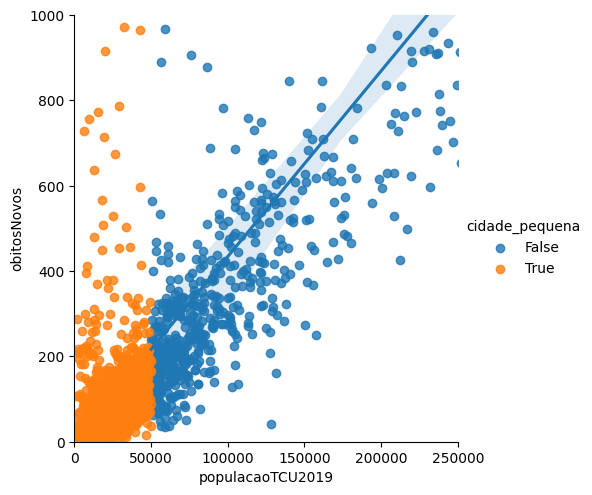

In [39]:
city_infecction_and_population['cidade_pequena'] = city_infecction_and_population['populacaoTCU2019'] < 50_000

g = sns.lmplot(data=city_infecction_and_population,
               x='populacaoTCU2019', y='obitosNovos', hue='cidade_pequena')
g.set(xlim=(0, 25e4), ylim=(0, 1_000));

<font size=7><center><code>Executem todo este caderno...</code></center></font>

<font size=7><center><code>... bem como o caderno Juntando as Peças</code></center></font>